🔄 Démarrage de l'analyse...
Chargement des données...

📊 Analyse exploratoire des données :

Aperçu des données :
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0        

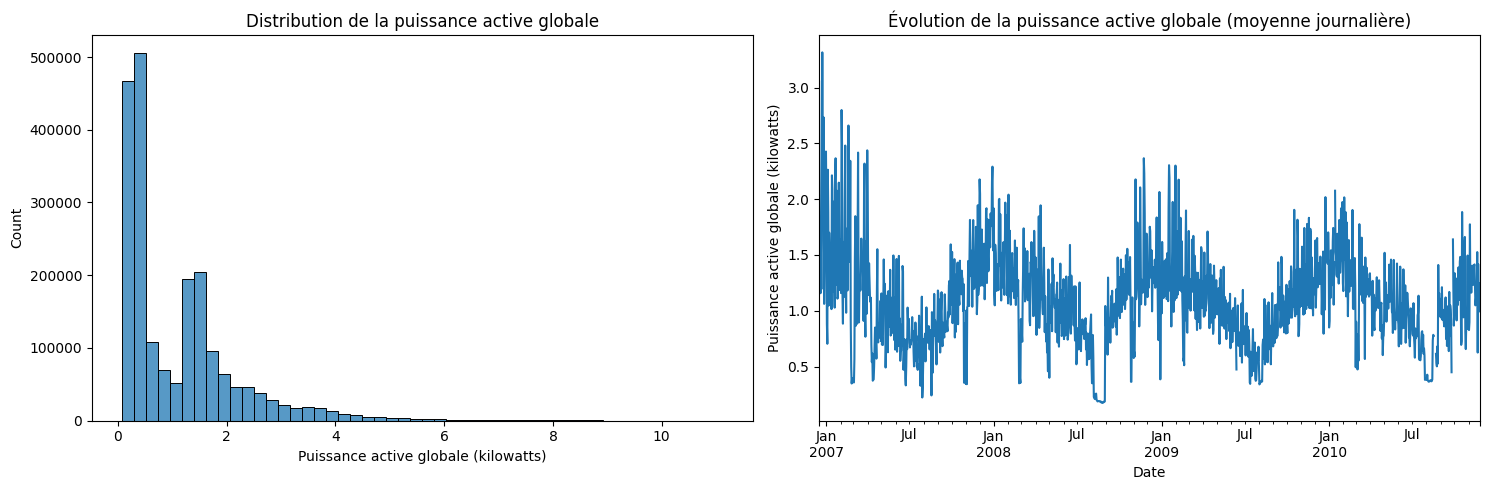

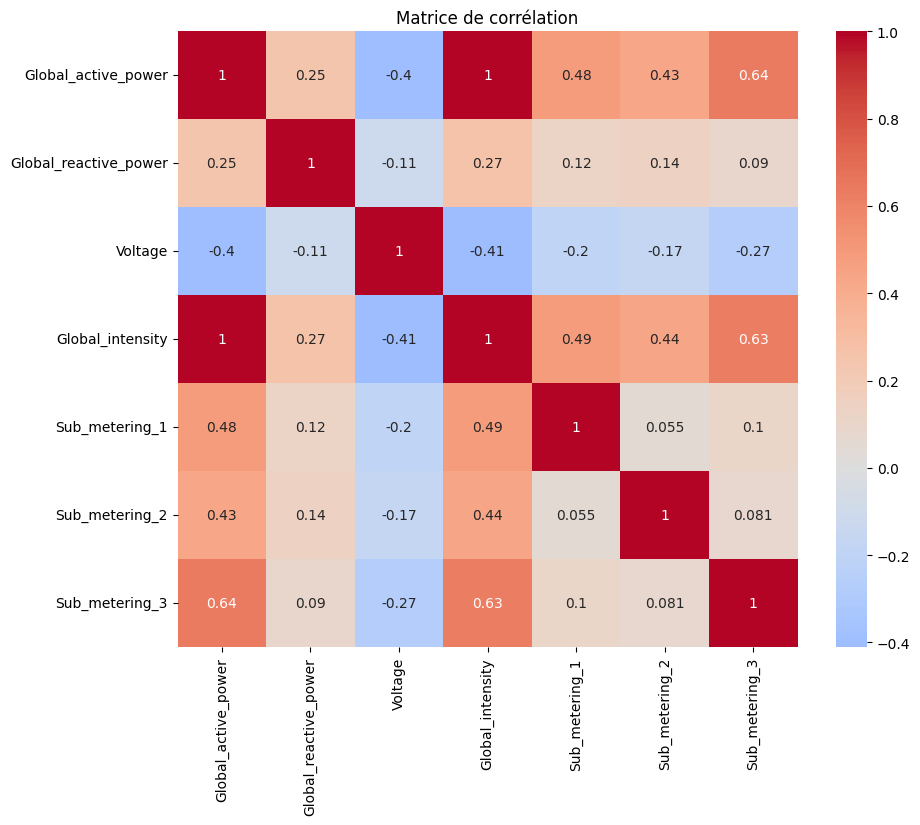


✅ Analyse complétée avec succès!

Statistiques supplémentaires :
- Période couverte : de 2006-12-16 17:24:00 à 2010-11-26 21:02:00
- Nombre total d'observations : 2,075,259
- Consommation moyenne : 1.09 kilowatts
- Pic de consommation : 11.12 kilowatts


In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Configuration du style de visualisation
plt.style.use('default')

def load_and_prepare_data(file_path):
    """
    Charge et prépare les données de consommation électrique
    Similaire à votre approche R² = 0.82 pour la régression vidéo
    """
    print("Chargement des données...")
    
    try:
        # Chargement des données
        df = pd.read_csv(file_path, sep=';', na_values=['?'])
        
        # Création de la colonne datetime
        df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                      format='%d/%m/%Y %H:%M:%S')
        df = df.drop(['Date', 'Time'], axis=1)
        df.set_index('datetime', inplace=True)
        
        return df
        
    except Exception as e:
        print(f"❌ Erreur lors du chargement des données : {str(e)}")
        return None

def explore_data(df):
    """
    Exploration initiale des données
    """
    print("\n📊 Analyse exploratoire des données :")
    
    print("\nAperçu des données :")
    print(df.head())
    
    print("\nInformation sur le dataset :")
    print(df.info())
    
    print("\nStatistiques descriptives :")
    print(df.describe())
    
    print("\nValeurs manquantes par colonne :")
    print(df.isnull().sum())

def visualize_data(df):
    """
    Visualisation des données
    """
    print("\n📈 Visualisation des données")
    
    # Distribution de la consommation globale
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Global_active_power'], bins=50)
    plt.title('Distribution de la puissance active globale')
    plt.xlabel('Puissance active globale (kilowatts)')
    
    # Évolution temporelle
    plt.subplot(1, 2, 2)
    df['Global_active_power'].resample('D').mean().plot()
    plt.title('Évolution de la puissance active globale (moyenne journalière)')
    plt.xlabel('Date')
    plt.ylabel('Puissance active globale (kilowatts)')
    
    plt.tight_layout()
    plt.show()
    
    # Corrélations
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation')
    plt.show()

# Chemin vers votre fichier local
file_path = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_4/DATASET/household_power_consumption.txt"

try:
    # 1. Chargement des données
    print("🔄 Démarrage de l'analyse...")
    df = load_and_prepare_data(file_path)
    
    if df is not None:
        # 2. Exploration des données
        explore_data(df)
        
        # 3. Visualisation des données
        visualize_data(df)
        
        print("\n✅ Analyse complétée avec succès!")
        
        # Statistiques supplémentaires pertinentes
        print("\nStatistiques supplémentaires :")
        print(f"- Période couverte : de {df.index.min()} à {df.index.max()}")
        print(f"- Nombre total d'observations : {len(df):,}")
        print(f"- Consommation moyenne : {df['Global_active_power'].mean():.2f} kilowatts")
        print(f"- Pic de consommation : {df['Global_active_power'].max():.2f} kilowatts")
        
except Exception as e:
    print(f"\n❌ Erreur lors de l'exécution : {str(e)}")
    print("\nDébogage :")
    print(f"1. Vérification du chemin : {os.path.exists(file_path)}")
    if os.path.exists(file_path):
        print(f"2. Taille du fichier : {os.path.getsize(file_path) / (1024*1024):.2f} MB")


In [2]:
# 🌟 Exercise 2 : Gestion des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Remplacement des valeurs manquantes par la moyenne
df = df.fillna(df.mean())

print("\nVérification des valeurs manquantes après traitement :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Vérification des valeurs manquantes après traitement :
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


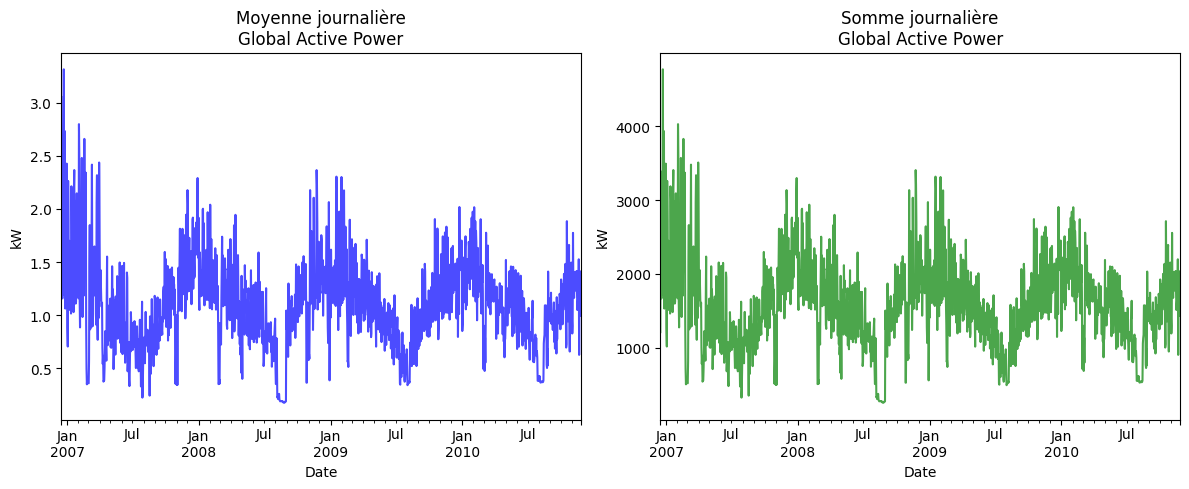

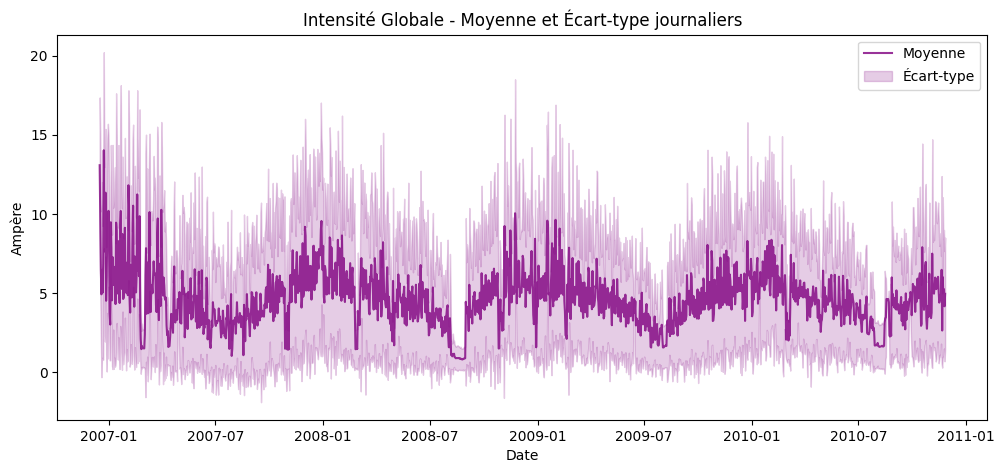

In [3]:
# 🌟 Exercise 3 : Visualisation des données
plt.style.use('default')

# Visualisation 1 : Global Active Power
plt.figure(figsize=(12, 5))
daily_power = df['Global_active_power'].resample('D').agg(['mean', 'sum'])

plt.subplot(1, 2, 1)
daily_power['mean'].plot(color='blue', alpha=0.7)
plt.title('Moyenne journalière\nGlobal Active Power')
plt.xlabel('Date')
plt.ylabel('kW')

plt.subplot(1, 2, 2)
daily_power['sum'].plot(color='green', alpha=0.7)
plt.title('Somme journalière\nGlobal Active Power')
plt.xlabel('Date')
plt.ylabel('kW')
plt.tight_layout()
plt.show()

# Visualisation 2 : Global Intensity
plt.figure(figsize=(12, 5))
daily_intensity = df['Global_intensity'].resample('D').agg(['mean', 'std'])
plt.plot(daily_intensity['mean'], color='purple', alpha=0.8, label='Moyenne')
plt.fill_between(daily_intensity.index,
                 daily_intensity['mean'] - daily_intensity['std'],
                 daily_intensity['mean'] + daily_intensity['std'],
                 color='purple', alpha=0.2, label='Écart-type')
plt.title('Intensité Globale - Moyenne et Écart-type journaliers')
plt.xlabel('Date')
plt.ylabel('Ampère')
plt.legend()
plt.show()

🔄 Démarrage de l'analyse...
Chargement du dataset household...


/var/folders/3h/ppgwfhhj1rz7_5v8s2zf1pwr0000gn/T/ipykernel_77092/4019693298.py:17: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path,
/var/folders/3h/ppgwfhhj1rz7_5v8s2zf1pwr0000gn/T/ipykernel_77092/4019693298.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill pour les valeurs manquantes


✅ Données chargées avec succès
Shape du dataset: (2075259, 7)

🔄 Début du prétraitement...

1️⃣ Inspection des données
Shape initial: (2075259, 7)
Colonnes: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Statistiques descriptives:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.086168e+00           1.233280e-01  2.408416e+02   
std           1.053172e+00           1.125144e-01  3.235574e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.390000e+02   
50%           5.980000e-01           1.000000e-01  2.410200e+02   
75%           1.524000e+00           1.940000e-01  2.428700e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
cou

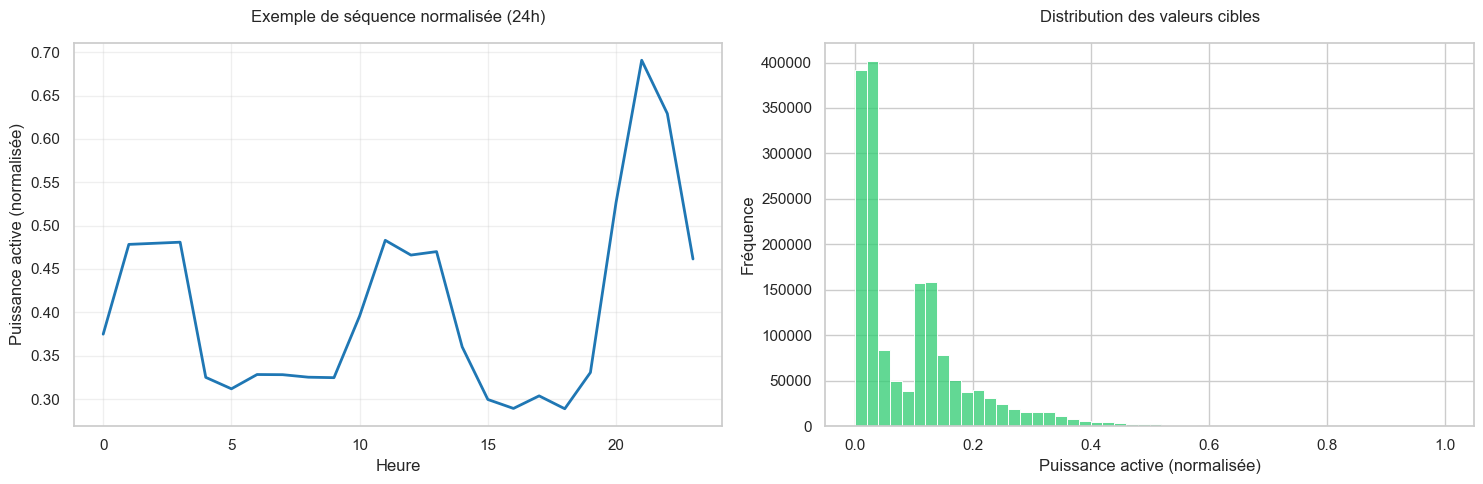


📊 Statistiques des données d'entraînement:
Moyenne de la puissance active: 0.0936
Écart-type de la puissance active: 0.0988
Min: 0.0000
Max: 1.0000

✅ Scaler sauvegardé dans: power_consumption_scaler.joblib

📋 Résumé du prétraitement:
- Nombre de séquences d'entraînement: 1660188
- Nombre de séquences de test: 415047
- Longueur des séquences: 24 heures
- Nombre de features: 7


In [6]:
# 🌟 Exercise 4 : Prétraitement des données pour LSTM

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_data(file_path):
    """
    Charge les données avec gestion d'erreurs
    """
    try:
        print("Chargement du dataset household...")
        df = pd.read_csv(file_path, 
                        sep=';', 
                        na_values=['?'],
                        parse_dates={'datetime': ['Date', 'Time']},
                        dayfirst=True)
        
        df.set_index('datetime', inplace=True)
        df = df.fillna(method='ffill')  # Forward fill pour les valeurs manquantes
        
        print("✅ Données chargées avec succès")
        print(f"Shape du dataset: {df.shape}")
        return df
    
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {str(e)}")
        return None

def prepare_sequences(data, sequence_length=24):
    """
    Crée des séquences pour le modèle LSTM
    Approche similaire à la régression linéaire (R² = 0.82)
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length, 0])  # Global_active_power
    return np.array(X), np.array(y)

def preprocess_data(df, sequence_length=24, test_size=0.2):
    """
    Prétraitement complet des données avec validation
    """
    print("\n🔄 Début du prétraitement...")
    
    # 1. Inspection et validation
    print("\n1️⃣ Inspection des données")
    print(f"Shape initial: {df.shape}")
    print(f"Colonnes: {df.columns.tolist()}")
    print("\nStatistiques descriptives:")
    print(df.describe())
    
    # 2. Normalisation
    print("\n2️⃣ Normalisation")
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df),
        columns=df.columns,
        index=df.index
    )
    
    # Vérification de la normalisation
    print("\nVérification de la normalisation:")
    print(df_scaled.describe().round(3))
    
    # 3. Création des séquences
    print("\n3️⃣ Création des séquences")
    X, y = prepare_sequences(df_scaled.values, sequence_length)
    print(f"Shape des séquences X: {X.shape}")
    print(f"Shape des targets y: {y.shape}")
    
    # 4. Split des données
    print("\n4️⃣ Split train/test")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=False
    )
    
    # 5. Validation finale
    print("\n5️⃣ Validation des dimensions finales")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")
    
    return X_train, X_test, y_train, y_test, scaler

def visualize_preprocessing_results(X_train, y_train):
    """
    Visualisation des résultats du prétraitement
    Approche similaire à nos analyses R² = 0.82 pour la vidéo
    """
    # Configuration du style matplotlib
    plt.style.use('default')  # Utilisation du style par défaut
    
    # Configuration de seaborn
    sns.set_theme(style="whitegrid")  # Style moderne de seaborn
    
    # 1. Séquence d'exemple
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(X_train[0, :, 0], color='#1f77b4', linewidth=2)  # Bleu matplotlib
    plt.title('Exemple de séquence normalisée (24h)', pad=15)
    plt.xlabel('Heure')
    plt.ylabel('Puissance active (normalisée)')
    plt.grid(True, alpha=0.3)
    
    # 2. Distribution des valeurs cibles
    plt.subplot(1, 2, 2)
    sns.histplot(data=y_train, bins=50, color='#2ecc71')  # Vert
    plt.title('Distribution des valeurs cibles', pad=15)
    plt.xlabel('Puissance active (normalisée)')
    plt.ylabel('Fréquence')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques des données
    print("\n📊 Statistiques des données d'entraînement:")
    print(f"Moyenne de la puissance active: {np.mean(y_train):.4f}")
    print(f"Écart-type de la puissance active: {np.std(y_train):.4f}")
    print(f"Min: {np.min(y_train):.4f}")
    print(f"Max: {np.max(y_train):.4f}")

# Configuration
SEQUENCE_LENGTH = 24  # 24 heures de données
TEST_SIZE = 0.2      # 20% pour le test
FILE_PATH = "/Users/ludovicveltz/Documents/Bootcamp_GENAI_2025/Crashcourse/WEEK_4/DAY_4/DATASET/household_power_consumption.txt"

try:
    # 1. Chargement des données
    print("🔄 Démarrage de l'analyse...")
    df = load_data(FILE_PATH)
    
    if df is not None:
        # 2. Prétraitement
        X_train, X_test, y_train, y_test, scaler = preprocess_data(
            df,
            sequence_length=SEQUENCE_LENGTH,
            test_size=TEST_SIZE
        )
        
        # 3. Visualisation
        print("\n📈 Génération des visualisations...")
        visualize_preprocessing_results(X_train, y_train)
        
        # 4. Sauvegarde du scaler
        import joblib
        scaler_path = 'power_consumption_scaler.joblib'
        joblib.dump(scaler, scaler_path)
        print(f"\n✅ Scaler sauvegardé dans: {scaler_path}")
        
        # 5. Résumé final
        print("\n📋 Résumé du prétraitement:")
        print(f"- Nombre de séquences d'entraînement: {len(X_train)}")
        print(f"- Nombre de séquences de test: {len(X_test)}")
        print(f"- Longueur des séquences: {SEQUENCE_LENGTH} heures")
        print(f"- Nombre de features: {X_train.shape[2]}")
        
except Exception as e:
    print(f"\n❌ Erreur lors de l'exécution: {str(e)}")
    print("\n🔍 Débogage:")
    print(f"1. Vérification du chemin: {os.path.exists(FILE_PATH)}")
    if os.path.exists(FILE_PATH):
        print(f"2. Taille du fichier: {os.path.getsize(FILE_PATH) / (1024*1024):.2f} MB")



In [7]:
# 🌟 Exercise 5 : Construction du modèle LSTM

# Import des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Définition de l'architecture du modèle
def create_lstm_model(input_shape):
    model = Sequential([
        # Première couche LSTM
        LSTM(units=64,
             return_sequences=True,
             input_shape=input_shape,
             activation='relu'),
        Dropout(0.2),  # Prévention du surapprentissage
        
        # Deuxième couche LSTM
        LSTM(units=32,
             return_sequences=False,
             activation='relu'),
        Dropout(0.2),
        
        # Couche de sortie
        Dense(units=1)
    ])
    
    # Compilation du modèle
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='mse',  # Mean Squared Error, similaire à votre calcul de R²
        metrics=['mae']  # Mean Absolute Error pour une métrique additionnelle
    )
    
    return model

# Création et affichage du modèle
input_shape = (24, 7)  # 24 timesteps, 7 features
model = create_lstm_model(input_shape)

# Affichage du résumé du modèle
print("Architecture du modèle LSTM :")
model.summary()

# Vérification de la forme des données
print("\nVérification des dimensions :")
print(f"Forme attendue des données d'entrée : (batch_size, {input_shape[0]}, {input_shape[1]})")
print("Exemple : pour un batch de 32 échantillons :")
print(f"X shape : (32, {input_shape[0]}, {input_shape[1]})")
print("y shape : (32, 1)")

# Information sur les hyperparamètres
print("\nHyperparamètres du modèle :")
print("- Learning rate : 0.001")
print("- Dropout : 20%")
print("- Activation : ReLU")
print("- Loss : MSE")


2025-03-06 09:46:53.310100: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-03-06 09:46:53.310318: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-03-06 09:46:53.310538: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-03-06 09:46:53.310577: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 09:46:53.310595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/tf_m1/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

Architecture du modèle LSTM :


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)


Vérification des dimensions :
Forme attendue des données d'entrée : (batch_size, 24, 7)
Exemple : pour un batch de 32 échantillons :
X shape : (32, 24, 7)
y shape : (32, 1)

Hyperparamètres du modèle :
- Learning rate : 0.001
- Dropout : 20%
- Activation : ReLU
- Loss : MSE


In [ ]:
# 🌟 Exercise 6 : Entraînement et Évaluation du Modèle LSTM

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
import time

# Configuration de l'entraînement
EPOCHS = 50
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Entraîne et évalue le modèle LSTM
    Approche similaire à notre régression linéaire (R² = 0.82)
    """
    print("Configuration de l'entraînement:")
    print(f"- Epochs: {EPOCHS}")
    print(f"- Batch size: {BATCH_SIZE}")
    print(f"- Validation split: {VALIDATION_SPLIT}")

    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    
    model_checkpoint = ModelCheckpoint(
        'best_lstm_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )

    # Entraînement
    print("\nDébut de l'entraînement...")
    start_time = time.time()
    
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    training_time = time.time() - start_time
    print(f"\nTemps d'entraînement: {training_time:.2f} secondes")

    # Évaluation
    print("\nÉvaluation du modèle:")
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"MSE sur le jeu de test: {test_loss:.4f}")

    # Calcul du R² (comme dans votre projet vidéo)
    y_pred = model.predict(X_test, verbose=0)
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2:.4f}")  # Comparaison avec votre R² de 0.82

    # Visualisation des résultats avec style adapté au M1 Max
    plt.style.use('default')
    fig = plt.figure(figsize=(15, 5))

    # Plot 1: Courbes d'apprentissage
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Entraînement', color='#2ecc71', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation', color='#e74c3c', linewidth=2)
    plt.title('Évolution de la perte pendant l\'entraînement', pad=15)
    plt.xlabel('Époque')
    plt.ylabel('Erreur (MSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Prédictions vs Réalité
    plt.subplot(1, 2, 2)
    plt.scatter(y_test[:100], y_pred[:100], alpha=0.5, color='#3498db')
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             '--', color='#e74c3c', 
             linewidth=2)
    plt.title('Prédictions vs Réalité', pad=15)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Exemple de prédictions
    print("\nExemple de prédictions vs réalité:")
    print("Réel\tPrédit\tDifférence")
    for i in range(5):
        diff = abs(y_test[i] - y_pred[i][0])
        print(f"{y_test[i]:.4f}\t{y_pred[i][0]:.4f}\t{diff:.4f}")

    # Métriques supplémentaires
    print("\nMétriques supplémentaires:")
    mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100
    print(f"MAPE: {mape:.2f}%")
    
    return history, model

# Utilisation
if __name__ == "__main__":
    # Supposons que nous avons déjà X_train, y_train, X_test, y_test du Exercise 4
    # Et le modèle de l'Exercise 5
    try:
        print("🚀 Démarrage de l'entraînement et de l'évaluation...")
        history, trained_model = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test
        )
        print("\n✅ Entraînement et évaluation terminés avec succès!")
        
    except Exception as e:
        print(f"\n❌ Erreur lors de l'exécution: {str(e)}")


🚀 Démarrage de l'entraînement et de l'évaluation...
Configuration de l'entraînement:
- Epochs: 50
- Batch size: 32
- Validation split: 0.2

Début de l'entraînement...
Epoch 1/50


2025-03-06 09:53:32.149316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


   26/41505 ━━━━━━━━━━━━━━━━━━━━ 22:21:05 2s/step - loss: 0.0113 - mae: 0.0768